In [1]:
import numpy as np
import statsmodels.api as sm
### Example from here; 
### https://www.statsmodels.org/stable/dev/generated/statsmodels.base.model.LikelihoodModelResults.f_test.html?highlight=f_test#statsmodels.base.model.LikelihoodModelResults.f_test

In [4]:
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
results = sm.OLS(data.endog, data.exog).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           4.98e-10
Time:                        15:50:57   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [10]:
#An r x k array where r is the number of restrictions to test and k is the number of regressors. 
#It is assumed that the linear combination is equal to zero.
A = np.identity(len(results.params))

### remove the first ROW because corresponds to offset? 
A = A[1:,:]

In [21]:
A

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [12]:
### This tests that each coefficient is jointly statistically significantly different from zero.
print(results.f_test(A))

<F test: F=array([[330.28533935]]), p=4.984030521273294e-10, df_denom=9, df_num=6>


In [15]:
data.exog.shape

(16, 7)

In [19]:
### This tests that the coefficient on the 2nd and 3rd regressors are equal 
### and jointly that the coefficient on the 5th and 6th regressors are equal.\
B = np.array(([0,0,1,-1,0,0,0],[0,0,0,0,0,1,-1]))

In [20]:
B

array([[ 0,  0,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -1]])

In [2]:
## Strings also works 
from statsmodels.datasets import longley
from statsmodels.formula.api import ols
dta = longley.load_pandas().data
formula = 'TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR'
results = ols(formula, dta).fit()
hypotheses = '(GNPDEFL = GNP), (UNEMP = 2), (YEAR/1829 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[144.17976065]]), p=6.322026217388005e-08, df_denom=9, df_num=3>


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [3]:
####
import pandas as pd
import statsmodels.formula.api as smf

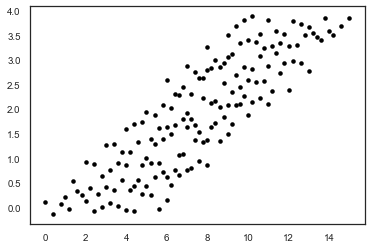

In [4]:
r2 = []; tsk = []; anim_day = [];
f, ax = plt.subplots()
for i in range(10): 
    for t in range(16):
        r2.append(np.random.randn(50) + 0.4*i + 0.1*t)
        tsk.append(np.zeros((50,)) + t)
        anim_day.append(np.zeros((50, )) + i)
        ax.plot(i+0.4*t, np.mean(np.random.randn(50) + 0.4*i + 0.01*t), 'k.')

In [5]:
r2 = np.hstack((r2))
tsk = np.hstack((tsk))
anim_day = np.hstack((anim_day))

In [10]:
#### Linear mixed effec with Gropu as group, only intercept ####
data = pd.DataFrame(dict(Tsk=tsk, Metric=r2, AnimDay=anim_day))
md = smf.mixedlm("Metric ~ C(Tsk)", data, groups=data['AnimDay'])
mdf = md.fit()
#print('mean X: %.3f'%(np.mean(X)))
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Metric     
No. Observations: 8000    Method:             REML       
No. Groups:       10      Scale:              0.9967     
Min. group size:  800     Likelihood:         -11397.4048
Max. group size:  800     Converged:          Yes        
Mean group size:  800.0                                  
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       1.736    0.389  4.458 0.000  0.973  2.500
C(Tsk)[T.1.0]   0.139    0.063  2.198 0.028  0.015  0.263
C(Tsk)[T.2.0]   0.264    0.063  4.182 0.000  0.140  0.388
C(Tsk)[T.3.0]   0.312    0.063  4.935 0.000  0.188  0.435
C(Tsk)[T.4.0]   0.548    0.063  8.681 0.000  0.424  0.672
C(Tsk)[T.5.0]   0.577    0.063  9.143 0.000  0.454  0.701
C(Tsk)[T.6.0]   0.696    0.063 11.021 0.000  0.572  0.820
C(Tsk)[T.7.0]   0.779   

In [11]:
#### Linear mixed effect with Gropu as categorical variable, only intercept ####
md = smf.mixedlm("Metric ~ C(Grp)", data, groups=data['Dummy'])
mdf = md.fit()
#print('mean X: %.3f'%(np.mean(X)))
print(mdf.summary())

KeyError: 'Dummy'

In [8]:
#### OLS with Gropu as categorical, only intercept ####
md = smf.ols("Metric ~ C(Tsk)", data)
mdf = md.fit()
print('mean X: %.3f'%(np.mean(X)))
print(mdf.summary())

A = np.identity(len(mdf.params))
#A = A[1:, :]
A = A[2, :]

print(mdf.f_test(A))

NameError: name 'X' is not defined

In [57]:
len(mdf.params)

10

In [59]:
A.shape

(10, 11)

In [16]:
A = np.identity(len(mdf.params))
A = A[2, :]
mdf.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[17.4926887]]), p=2.914999524015643e-05, df_denom=7984, df_num=1>

In [15]:
rez.pvalue

array(2.91499952e-05)